<a href="https://colab.research.google.com/github/judecir/select_container_box_cilynder/blob/main/Select%20Container%20Box%20Cylinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Optimization Raizen

By: Judecir Cavalcante (judecir@gmail.com | https://www.linkedin.com/in/judecir-jr/)

# Description

You are a participant in a TV show, and you are running for the big prize. In this last challenge, you have in front of you a total of 40 containers. Each container contains up to 3 boxes, and those boxes contain some cylinders. The volume and weight of each cylinder is listed below.

To win this challenge, **you must choose 35 containers** and use cylinders from the boxes in the chosen containers to reach a **total volume of 5163.69 milliliters** and a **total weight of 18.844 kg**. For any **selected container*, you may use as many boxes as you want (**at least one for each chosen container*). However, you **can choose only one cylinder from each box**.

Which containers, boxes and cylinders will you choose? Is there more than one winner option? The table below presents all necessary data to support your decision.

Besides the problem solution, please also send the mathematical formulation and your code (commented). Feel free to select the desired optimization approach. PuLP is a free and open-source solver that can handle this problem, but other options are also valid (Reference: Optimization Modeling in Python: PuLP, Gurobi, and CPLEX | by Opex Analytics | The Opex Analytics Blog | Medium).


# Libraries

In [69]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from google.colab import files

import pandas as pd
import numpy as np

# Data vizualition
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt

from ortools.linear_solver import pywraplp
from ortools.sat.python import cp_model


# Parameters

In [71]:
URL_DATA = "https://raw.githubusercontent.com/judecir/select_container_box_cilynder/main/data.csv"

# Business parameters
MODEL_DEFAULT_CONTAINER = 35
MODEL_DEFAULT_VOLUME = 5163.69 # mL
MODEL_DEFAULT_WEIGHT = 18.844 *1000 # g

# Model parameters
MODEL_TIME_LIMIT_SECONDS = 3600

PARAMS_MOD = {"MODEL_TIME_LIMIT_SECONDS":MODEL_TIME_LIMIT_SECONDS,
              "DISPLAY_LOG":True}

# Solve status
MODEL_IP_STATUS = {
    pywraplp.Solver.OPTIMAL: 'OPTIMAL',
    pywraplp.Solver.FEASIBLE: 'FEASIBLE',
    pywraplp.Solver.INFEASIBLE: 'INFEASIBLE',
    pywraplp.Solver.UNBOUNDED: 'UNBOUNDED',
    pywraplp.Solver.ABNORMAL: 'ABNORMAL',
    pywraplp.Solver.NOT_SOLVED: 'NOT_SOLVED'
}
# List os parameters with solution
LT_PARAMS_IP_MODEL_WITH_SOL = [pywraplp.Solver.OPTIMAL, pywraplp.Solver.FEASIBLE]

MODEL_CP_STATUS = {
    cp_model.OPTIMAL: "OPTIMAL",
    cp_model.FEASIBLE: "FEASIBLE",
    cp_model.INFEASIBLE: "INFEASIBLE",
    cp_model.UNKNOWN: "UNKNOWN" 
}
# List os parameters with solution
LT_PARAMS_CP_MODEL_WITH_SOL = [cp_model.OPTIMAL, cp_model.FEASIBLE]


# Import data

In [72]:
def read_data(url):
  try:
    df = pd.read_csv(url, sep=";")

    # Convert type to object
    df["Cylinder"] = df["Cylinder"].astype(object)

    print(df.info())
    return df
  except:
    print("Error reading file!")


In [73]:
df = read_data(url=URL_DATA)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Container             411 non-null    object 
 1   Box                   411 non-null    object 
 2   Cylinder              411 non-null    object 
 3   Cylinder weight (g)   411 non-null    int64  
 4   Cylinder volume (mL)  411 non-null    float64
 5   Density (g/mL)        411 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.4+ KB
None


,Container,Box,Cylinder,Cylinder weight (g),Cylinder volume (mL),Density (g/mL)
0,A,LB_1,1,294,140.00,2.1000
1,A,LB_1,2,832,94.87,8.7699
2,B,LB_1,1,977,101.14,9.6599
3,B,LB_1,2,57,8.88,6.4189
4,B,LB_1,3,999,135.55,7.3700


# Exploratory Data Analysis

In [74]:
print(f'Total of Container: {df["Container"].nunique()}')
print(f'Total of Box: {df["Box"].nunique()}')
print(f'Total of Cylinder: {df["Cylinder"].nunique()}')

Total of Container: 40
Total of Box: 2
Total of Cylinder: 25


In [75]:
df.describe()

,Cylinder weight (g),Cylinder volume (mL),Density (g/mL)
count,411.000000,411.000000,411.000000
mean,409.328467,109.353869,5.321959
std,398.345146,153.020208,2.715398
min,5.000000,0.520000,1.000000
25%,48.500000,12.515000,3.010050
50%,216.000000,49.500000,5.101100
75%,946.500000,136.250000,7.794750
max,999.000000,989.110000,9.970400


In [76]:
df.groupby(["Container"])["Box"].nunique()

Container
A     1
AA    2
AB    2
AC    1
AD    2
AE    1
AF    1
AG    2
AI    2
AJ    1
AK    1
AL    2
AM    2
AN    2
AO    2
AP    1
AQ    1
B     2
C     2
D     2
F     1
G     1
H     2
I     1
J     2
K     1
L     1
M     2
N     1
O     1
P     1
Q     1
R     1
S     1
T     2
U     2
V     1
X     1
Y     2
Z     2
Name: Box, dtype: int64

Text(0.5, 1.0, 'Mean Cylinder weight (g) per Container')

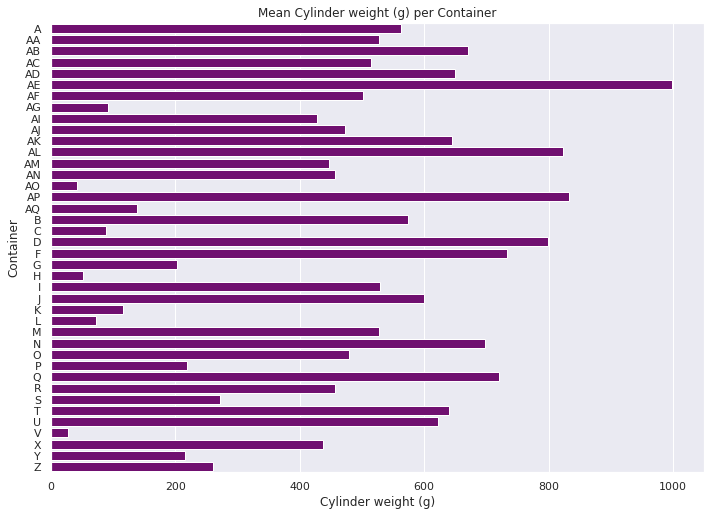

In [77]:
df_gb_container = df.groupby(["Container"], as_index=False).mean()
column_plot = "Cylinder weight (g)"
sns.barplot(data=df_gb_container, 
            x=column_plot, 
            y="Container",
            color="purple")\
            .set_title(f"Mean {column_plot} per Container")

Text(0.5, 1.0, 'Mean Cylinder volume (mL) per Container')

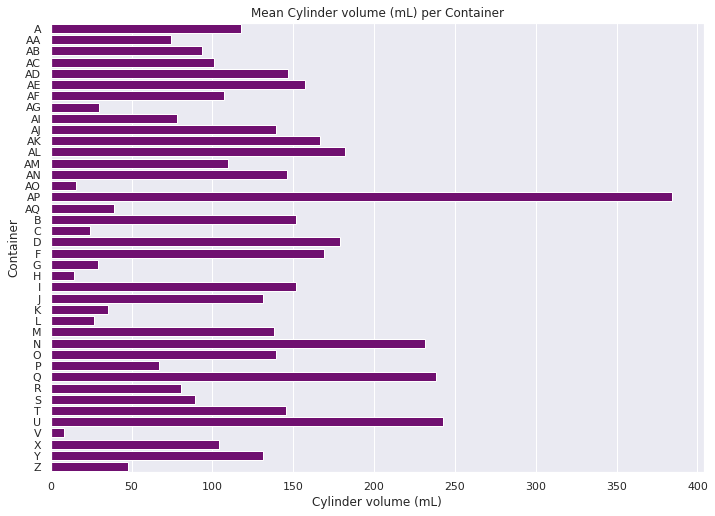

In [78]:
column_plot = "Cylinder volume (mL)"
sns.barplot(data=df_gb_container, 
            x=column_plot, 
            y="Container",
            color="purple")\
            .set_title(f"Mean {column_plot} per Container")


Text(0.5, 1.0, 'Mean Density (g/mL) per Container')

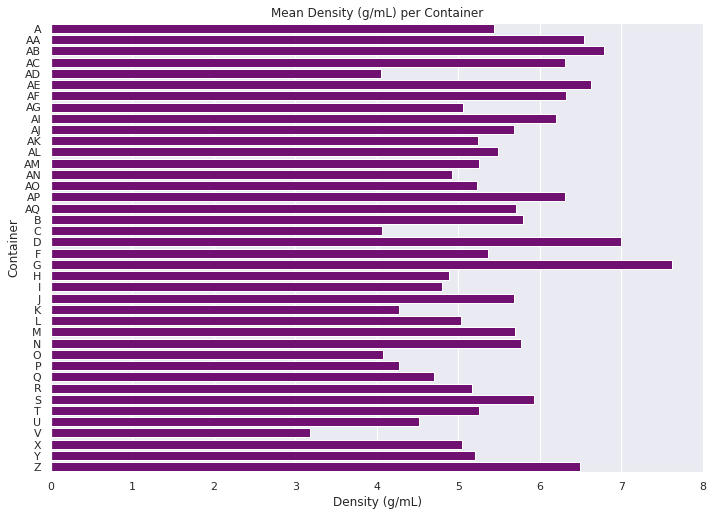

In [79]:
column_plot = "Density (g/mL)"
sns.barplot(data=df_gb_container, 
            x=column_plot, 
            y="Container",
            color="purple")\
            .set_title(f"Mean {column_plot} per Container")

Text(0.5, 1.0, 'Cylinder weight (g) x Cylinder volume (mL)')

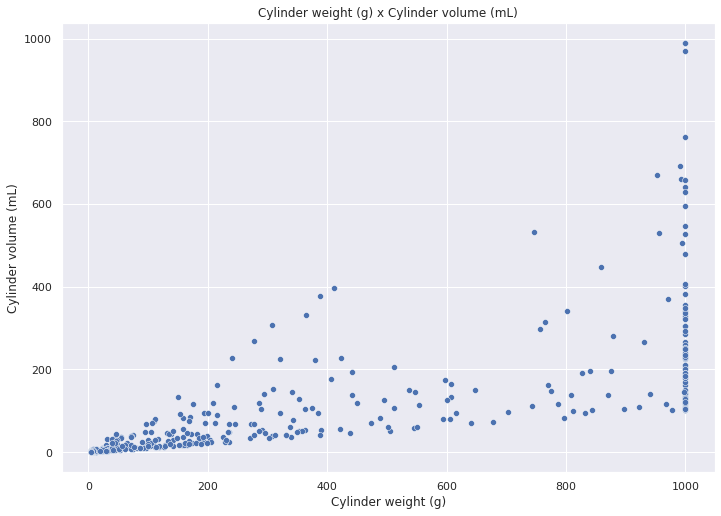

In [80]:
sns.scatterplot(data=df, 
                x="Cylinder weight (g)", 
                y="Cylinder volume (mL)")\
                .set_title("Cylinder weight (g) x Cylinder volume (mL)")

# Modeling

### Sets

* $C$: set of containers
* $B^c$: set of boxes from container $c$, $\forall c \in C$
* $D^{c, b}$: set of cylinders from container $c$ and box $b$,  $\forall c \in C, \forall b \in B^c$

### Paremeters

* $\alpha$: number of conteiners that you must choose
* $V$: total volume of cylinders choosen (mL) 
* $v_{c, b, i}$: volumn of cylinder $i$ from container $c$, $\forall c \in C, \forall b \in B^c, i \in D^c$
* $W$: total weight of cylinders choosen (g)
* $w_{c, b, i}$: weight of cylinder $i$ from container $c$, $\forall c \in C, \forall b \in B^c, i \in D^c$



In [81]:
def create_params(df):
  # Parameters
  params_bus = {}

  params_bus["C"] = df["Container"].unique()
  params_bus["B"] = df[["Container", "Box"]].drop_duplicates().groupby(["Container"])["Box"].apply(list).to_dict()
  params_bus["D"] = df.groupby(["Container", "Box"])["Cylinder"].apply(list).to_dict()

  params_bus["w"] = df.set_index(["Container", "Box", "Cylinder"])["Cylinder weight (g)"].to_dict()
  params_bus["v"] = df.set_index(["Container", "Box", "Cylinder"])["Cylinder volume (mL)"].to_dict()

  params_bus["a"] = MODEL_DEFAULT_CONTAINER
  params_bus["V"] = MODEL_DEFAULT_VOLUME
  params_bus["W"] = MODEL_DEFAULT_WEIGHT

  params_bus["typ"] = ['v', 'w']

  return params_bus

## Integer Programming Formulation




### Decision variables

*   \begin{equation}
    x_{c}=
    \begin{cases}
      1, & \text{if container}\ c \text{ is choose,} \forall c \in C\\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}


* \begin{equation}
    y_{c, b, i}=
    \begin{cases}
      1, & \text{if cylinder}\ i \text{ is choose from container c and box b,} \forall c \in C, i \in D^c, \forall b \in B^c\\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}

* $s^+_v \in \mathbb{R}$: slack + of volume
* $s^-_v \in \mathbb{R}$: slack - of volume
* $s^+_w \in \mathbb{R}$: slack + of weight
* $s^-_w \in \mathbb{R}$: slack - of weight

### Objective Function

* $\min s^+_v + s^-_v + s^+_w + s^-_w$

### Constraints

You must choose $\alpha$ (default is 35) containers:
* $\displaystyle \sum_{c \in C} x_c = \alpha $

For any selected container, you may use as many boxes as you want (at least one for each chosen container):
* $\displaystyle  x_{c} \leq \sum_{i \in D^{c, b}} y_{c, b, i}, \forall c \in C, \forall b \in B^c$
* $\displaystyle  \sum_{i \in D^{c, b}} y_{c, b, i} \leq x_{c}*|D^c|,\forall c \in C, \forall b \in B^c$

You can choose only one cylinder from each box:
* $ \displaystyle \sum_{i \in D^{c, b}}{y_{c,i}} \leq 1, \forall c \in C, \forall b \in B^c$

Total volume of $V$ (default is 5163.69 milliliters):
* $s^+_v - s^-_v +\displaystyle \sum_{i \in D^{c, b}} v_{c, b, i} \cdot y_{c, b, i} = V, \forall c \in C, \forall b \in B^c$

Total weight of $W$ (default is 18844g):
* $s^+_w - s^-_w + \displaystyle \sum_{i \in D^{c, b}} w_{c, b, i} \cdot y_{c, b, i} = W, \forall c \in C, \forall b \in B^c$

In [82]:
def create_ip_model(params_bus):
  # Model

  model = pywraplp.Solver.CreateSolver("SCIP")

  vars = {}

  # Variables
  vars["x"] = {c: model.IntVar(lb=0, ub=1, name=f'x[{c}]') for c in params_bus["C"]}
  vars["y"] = {(c, b, i): model.IntVar(lb=0, ub=1, name=f'y[{c, b, i}]') for c in params_bus["C"] for b in params_bus["B"][c] for i in params_bus["D"][c, b]}

  vars["s_plus"]  = {t: model.NumVar(lb=0.0, ub=params_bus["V"], name=f's+[{t}]') for t in params_bus["typ"]}
  vars["s_minus"] = {t: model.NumVar(lb=0.0, ub=params_bus["W"], name=f's-[{t}]') for t in params_bus["typ"]}

  # Constraints

  # You must choose  α  (default is 35) containers:
  model.Add(sum(vars["x"][c] for c in params_bus["C"]) == params_bus["a"], name="Total of container")


  for c in params_bus["C"]:
    for b in params_bus["B"][c]:
      expr_total_y = sum(vars["y"][c, b, i] for i in params_bus["D"][c, b])
      # For any selected container, you may use as many boxes as you want (at least one for each chosen container):
      model.Add(vars["x"][c]<= expr_total_y)
      model.Add(expr_total_y <= vars["x"][c]*len(params_bus["D"][c, b]))

      # You can choose only one cylinder from each box:
      model.Add(expr_total_y <= 1 )

  # Total volume of  V  (default is 5163.69 milliliters):
  model.Add(sum(params_bus["v"][c,b, i] * vars["y"][c,b, i] 
                for c in params_bus["C"] 
                for b in params_bus["B"][c] 
                for i in params_bus["D"][c, b]) \
            + vars["s_plus"]['v'] \
            - vars["s_minus"]['v'] == params_bus["V"], name="Total of volume")

  # Total weight of  W  (default is 18844g):
  model.Add(sum(params_bus["w"][c,b, i] * vars["y"][c,b, i] 
                for c in params_bus["C"] 
                for b in params_bus["B"][c] 
                for i in params_bus["D"][c, b]) \
            + vars["s_plus"]['w'] \
            - vars["s_minus"]['w'] == params_bus["W"], name="Total of weight")

  # Objective function
  model.Minimize(sum(vars["s_plus"][t] + vars["s_minus"][t] for t in params_bus["typ"]))

  print('Number of variables =', model.NumVariables())
  print('Number of constraints =', model.NumConstraints())

  return model, vars


def solve_ip_model(model, vars, params_bus, params_mod, df):
  column_solution = "IP Solution"

  model.set_time_limit(params_mod["MODEL_TIME_LIMIT_SECONDS"]*1000)
  status = model.Solve()
  print(f"Problem solved in {model.wall_time()/100} seconds")
  print(f"Problem solved in {model.iterations()} iterations")
  print(f"Problem with status = {MODEL_IP_STATUS[status]}")
  print(f"Problem with objective function {model.Objective().Value()}")

  if status in LT_PARAMS_IP_MODEL_WITH_SOL:
    solution = [[c, b, i, 1== vars["y"][c, b, i].solution_value()] for c in params_bus["C"] for b in params_bus["B"][c] for i in params_bus["D"][c, b]]
    df_solution = pd.DataFrame(solution, columns=["Container", "Box", "Cylinder", "Solution"])
    df_solution.set_index(["Container", "Box", "Cylinder"], inplace=True)

    df = df.set_index(["Container", "Box", "Cylinder"])
    df[column_solution]  = df_solution
    df.reset_index(inplace=True)
  else:
    df[column_solution] = np.nan

  return df

In [93]:
params_bus = create_params(df)
model_ip, vars_ip = create_ip_model(params_bus = params_bus)

df = solve_ip_model(model=model_ip, 
                    vars=vars_ip, 
                    params_bus=params_bus, 
                    params_mod=PARAMS_MOD, 
                    df=df)
df.head()

Number of variables = 455
Number of constraints = 180
Problem solved in 342.23 seconds
Problem solved in 51939 iterations
Problem with status = OPTIMAL
Problem with objective function 3.637978807091713e-12


,Container,Box,Cylinder,Cylinder weight (g),Cylinder volume (mL),Density (g/mL),IP Solution,CP Solution
0,A,LB_1,1,294,140.00,2.1000,False,False
1,A,LB_1,2,832,94.87,8.7699,True,False
2,B,LB_1,1,977,101.14,9.6599,False,False
3,B,LB_1,2,57,8.88,6.4189,True,False
4,B,LB_1,3,999,135.55,7.3700,False,False


## Constraint Programming Formulation


### Decision variables

*   \begin{equation}
    x_{c}=
    \begin{cases}
      1, & \text{if container}\ c \text{ is choose,} \forall c \in C\\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}


* \begin{equation}
    y_{c, b, i}=
    \begin{cases}
      1, & \text{if cylinder}\ i \text{ is choose from container c and box b,} \forall c \in C, i \in D^c, \forall b \in B^c\\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}


### Constraints

You must choose $\alpha$ (default is 35) containers:
* $\displaystyle \sum_{c \in C} x_c = \alpha $

For any selected container, you may use as many boxes as you want (at least one for each chosen container):
* $ x_{c} = 1 ⇒ \displaystyle \sum_{i \in D^{c, b}} y_{c, b, i} \geq 1, \forall c \in C, \forall b \in B^c$
* $ x_{c} = 0 ⇒ \displaystyle \sum_{i \in D^{c, b}} y_{c, b, i} = 0, \forall c \in C, \forall b \in B^c$

You can choose only one cylinder from each box:
* $ \displaystyle \sum_{i \in D^{c, b}}{y_{c,i}} \leq 1, \forall c \in C, \forall b \in B^c$

Total volume of $V$ (default is 5163.69 milliliters):
* $\displaystyle \sum_{i \in D^{c, b}} v_{c, b, i} \cdot y_{c, b, i} + s^+_v - s^-_v= V, \forall c \in C, \forall b \in B^c$

Total weight of $W$ (default is 18844g):
* $\displaystyle \sum_{i \in D^{c, b}} w_{c, b, i} \cdot y_{c, b, i}  + s^+_w - s^-_w = W, \forall c \in C, \forall b \in B^c$

In [84]:
class VarArraySolution(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
      cp_model.CpSolverSolutionCallback.__init__(self)
      self.__variables = variables
      self.__solution_count = 0
      self.__solutions = {}

    def on_solution_callback(self):
      self.__solution_count += 1
      self.__solutions[self.__solution_count] = {v.Name(): 1==self.Value(v) for v in self.__variables}

      #for v in self.__variables:
      #  self.__solutions[self.__solution_count][v] = self.Value(v)
      #  print('%s=%i' % (v, self.Value(v)), end=' ')
     # print("\n")

    def solution_count(self):
      return self.__solution_count

    def solutions(self):
      return self.__solutions


def create_cp_model(params_bus):
  # Model
  model = cp_model.CpModel()

  vars = {}

  # Variables
  #vars["x"] = {c: model.NewIntVar(lb=0, ub=1, name=f'x[{c}]') for c in params_bus["C"]}
  vars["x"] = {c: model.NewBoolVar(name=f'x[{c}]') for c in params_bus["C"]}
  vars["y"] = {(c, b, i): model.NewIntVar(lb=0, ub=1, name=f'y[{c, b, i}]') for c in params_bus["C"] for b in params_bus["B"][c] for i in params_bus["D"][c, b]}

  # Constraints

  # You must choose  α  (default is 35) containers:
  model.Add(sum(vars["x"][c] for c in params_bus["C"]) == params_bus["a"])


  for c in params_bus["C"]:
    for b in params_bus["B"][c]:
      # For any selected container, you may use as many boxes as you want (at least one for each chosen container):
      model.Add(sum(vars["y"][c, b, i] for i in params_bus["D"][c, b]) >= 1).OnlyEnforceIf(vars["x"][c])
      model.Add(sum(vars["y"][c, b, i] for i in params_bus["D"][c, b]) == 0).OnlyEnforceIf(vars["x"][c].Not())

      # You can choose only one cylinder from each box:
      model.Add(sum(vars["y"][c, b, i] for i in params_bus["D"][c, b]) <= 1 )

  # Total volume of  V  (default is 5163.69 milliliters):
  # Multiplying by 100 is necessary since CP cannot handle continuous expressions
  model.Add(sum(round(100*params_bus["v"][c,b, i]) * vars["y"][c,b, i] 
                for c in params_bus["C"] 
                for b in params_bus["B"][c] 
                for i in params_bus["D"][c, b]) == round(100*params_bus["V"]))

  # Total weight of  W  (default is 18844g):
  model.Add(sum(int(params_bus["w"][c,b, i]) * vars["y"][c,b, i] 
                for c in params_bus["C"] 
                for b in params_bus["B"][c] 
                for i in params_bus["D"][c, b]) == round(params_bus["W"]))
  
  return model, vars

def solve_cp_model(model, vars, params_bus, params_mod, df):
  column_solution = "CP Solution"

  solver = cp_model.CpSolver()
  solutions = VarArraySolution([vars["y"][c, b, i] for c in params_bus["C"] for b in params_bus["B"][c] for i in params_bus["D"][c, b]])
  solver.parameters.enumerate_all_solutions = params_mod["ALL_SOLUTIONS"]
  solver.parameters.max_time_in_seconds =  params_mod["MODEL_TIME_LIMIT_SECONDS"]
  solver.parameters.log_search_progress = params_mod["DISPLAY_LOG"]
  
  
  #status = solver.Solve(model, solution_printer)
  status = solver.Solve(model, solutions)
  print(f"Problem solved in {solver.WallTime()} seconds")
  print(f"Problem with status = {MODEL_CP_STATUS[status]}")
  print(f"Problem with objective function {solver.ObjectiveValue()}")
  if params_mod["ALL_SOLUTIONS"]:
    print(f"Problem with number of solutions: {solutions.solution_count()}")


  if status in LT_PARAMS_CP_MODEL_WITH_SOL:
    solution = [[c, b, i, 1== solver.Value(vars["y"][c, b, i])] for c in params_bus["C"] for b in params_bus["B"][c] for i in params_bus["D"][c, b]]
    df_solution = pd.DataFrame(solution, columns=["Container", "Box", "Cylinder", "Solution"])
    df_solution.set_index(["Container", "Box", "Cylinder"], inplace=True)

    df = df.set_index(["Container", "Box", "Cylinder"])
    df[column_solution]  = df_solution
    df.reset_index(inplace=True)
  else:
    df[column_solution] = np.nan

  return df, solutions

def create_df_all_solutions(solutions):
  lt_solutions = []
  for k1, v1  in solutions.solutions().items():
    id_solution = k1
    for k2, v2 in v1.items():
      variable = k2.replace("y[(", "").replace(")]", "").replace("'", "").replace(" ", "").split(",")
      value = v2
      lt_solutions.append([id_solution] + variable + [value])

  df_all_solutions = pd.DataFrame(lt_solutions, columns=["ID Solution", "Container", "Box", "Cylinder", "CP Solution"])
  return df_all_solutions

In [85]:
PARAMS_MOD["ALL_SOLUTIONS"] = True
model_cp, vars_cp = create_cp_model(params_bus = params_bus)
df, solutions = solve_cp_model(model=model_cp, 
                    vars=vars_cp, 
                    params_bus=params_bus, 
                    params_mod=PARAMS_MOD, 
                    df=df)
df.head()

Problem solved in 3599.997119779 seconds
Problem with status = FEASIBLE
Problem with objective function 0.0
Problem with number of solutions: 196


,Container,Box,Cylinder,Cylinder weight (g),Cylinder volume (mL),Density (g/mL),IP Solution,CP Solution
0,A,LB_1,1,294,140.00,2.1000,False,False
1,A,LB_1,2,832,94.87,8.7699,True,False
2,B,LB_1,1,977,101.14,9.6599,False,False
3,B,LB_1,2,57,8.88,6.4189,True,False
4,B,LB_1,3,999,135.55,7.3700,False,False


In [86]:
df_all_solutions = create_df_all_solutions(solutions)

# Results

* Which containers, boxes and cylinders will you choose? 
* Is there more than one winner option?

In [87]:
def analyze_solution(df, column_solution):
  print(f"\nAnalyze solution {column_solution}:")

  print(f'\tContainers used: {df.query(f"`{column_solution}`")["Container"].unique().__len__()}')
  print(f'\tBoxes used: {df.query(f"`{column_solution}`").groupby(["Container"])["Box"].nunique().max()}')
  print(f'\tMax cylinder used in each box: {df.query(f"`{column_solution}`").groupby(["Container", "Box"])["Cylinder"].nunique().max()}')
  print(f'\tCylinder weight (g): {df.query(f"`{column_solution}`")["Cylinder weight (g)"].sum()}')
  print(f'\tCylinder volume (mL): {df.query(f"`{column_solution}`")["Cylinder volume (mL)"].sum()}')

  print("\n ==================================================== \n ")

In [88]:
analyze_solution(df, column_solution="IP Solution")
analyze_solution(df, column_solution="CP Solution")


Analyze solution IP Solution:
	Containers used: 35
	Boxes used: 2
	Max cylinder used in each box: 1
	Cylinder weight (g): 18844
	Cylinder volume (mL): 5163.69

 

Analyze solution CP Solution:
	Containers used: 35
	Boxes used: 2
	Max cylinder used in each box: 1
	Cylinder weight (g): 18844
	Cylinder volume (mL): 5163.689999999999

 


In [95]:
print(f'Solutions found: {df_all_solutions["ID Solution"].nunique()}')

Solutions found: 196


Text(0.5, 1.0, 'Top 20 containers used in solutions')

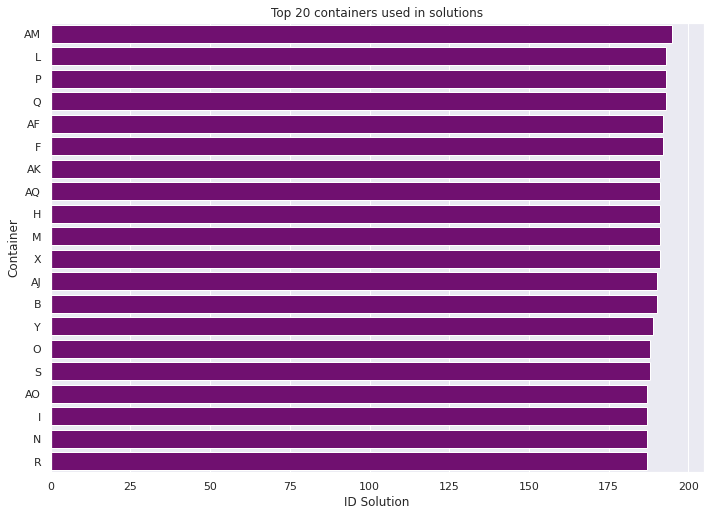

In [91]:
top = 20
sns.barplot(data=df_all_solutions.query("`CP Solution`").\
                  groupby(["Container"], as_index=False)["ID Solution"].\
                  nunique().\
                  nlargest(top, "ID Solution"),
            x="ID Solution",
            y="Container",
            color="purple").set_title(f"Top {top} containers used in solutions")

In [94]:
pd.pivot_table(df_all_solutions, index=["Container", "Box", "Cylinder"], columns=["ID Solution"], values="CP Solution", margins=True, aggfunc="sum")

ID Solution               1   2   3   4   5   6   7   8   9  10  ...  188  \
Container Box  Cylinder                                          ...        
A         LB_1 1          0   0   0   1   0   0   0   0   1   1  ...    1   
               2          0   1   1   0   1   1   1   1   0   0  ...    0   
AA        LB_1 1          1   1   0   1   1   1   0   0   0   1  ...    1   
               2          0   0   0   0   0   0   0   0   1   0  ...    0   
               3          0   0   0   0   0   0   0   1   0   0  ...    0   
...                      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
Z         LB_1 4          0   1   1   0   1   1   0   1   0   0  ...    1   
               5          0   0   0   0   0   0   1   0   0   0  ...    0   
               6          0   0   0   0   0   0   0   0   1   0  ...    0   
          LB_2 1          1   1   1   0   1   1   1   1   1   0  ...    1   
All                      51  49  49  49  49  49  49  51  49  50  ...   49   

ID Solution              189  190  191  192  193  194  195  196   All  
Container Box  Cylinder                                                
A         LB_1 1           1    1    1    0    0    0    1    0    90  
               2           0    0    0    0    0    1    0    0    94  
AA        LB_1 1           1    1    1    1    1    1    1    1   131  
               2           0    0    0    0    0    0    0    0    15  
               3           0    0    0    0    0    0    0    0     3  
...                      ...  ...  ...  ...  ...  ...  ...  ...   ...  
Z         LB_1 4           0    0    1    1    1    1    0    0   106  
               5           1    1    0    0    0    0    1    0     8  
               6           0    0    0    0    0    0    0    0     9  
          LB_2 1           1    1    1    1    1    1    1    0   147  
All                       49   50   50   51   51   51   51   51  9782  

[412 rows x 197 columns]